# Q1

In [501]:
import random

def activitiesDistribution ( n ):

    Movies,COMP551,Playing,Studying = 0,0,0,0     #initializing routine sample points

#loop through number of days in order to sample the routine
    for x in range (n):
        y = random.random()     #generating random variable 
        if(0.0 <= y < 0.1):
            Playing += 1
            
        elif(0.1 <= y < 0.3):
            Movies += 1
            
        elif(0.3 <= y <= 0.6):
            Studying += 1
            
        else:
            COMP551 = COMP551 + 1
    
    print("Fraction of days spent in each activity for ",n," days")
    print("Movies: ", Movies, "/", n)
    print("COMP-551: ", COMP551, "/", n)
    print("Playing: ", Playing, "/", n)
    print("Studying: ", Studying, "/", n, "\n")
    return

#Calling functions with n = 100 and 1000
activitiesDistribution(100)
activitiesDistribution(1000)
        

Fraction of days spent in each activity for  100  days
Movies:  17 / 100
COMP-551:  43 / 100
Playing:  10 / 100
Studying:  30 / 100 

Fraction of days spent in each activity for  1000  days
Movies:  181 / 1000
COMP-551:  384 / 1000
Playing:  116 / 1000
Studying:  319 / 1000 



# Q2.1

MSE for training set is:  6.474756052842826
MSE for validation set is:  1422.6928558709617 



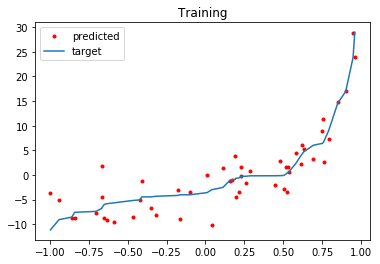

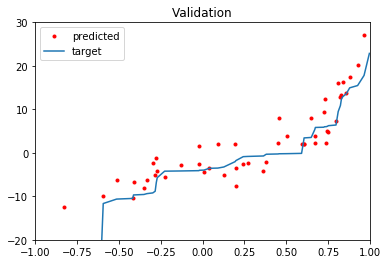

In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#function to calculate the MSE
def meanSquareError(predicted_y, target_y):
    return np.mean(((predicted_y - target_y) ** 2)) 

#function to build the polynomial matrix 
def matrixBuilder(x, degree):
    matrix = np.zeros((len(x),degree))
    for i in range(len(x)):
        for j in range(degree):
            matrix[i][j] = np.power(x[i], j)
    return matrix
    
#calculating L2 mse for different lambda
def L2 (X, y, rowNum):
    λ = []
    new_w = 0
    t= 0.0001  
    i=np.identity(rowNum)
    mse = []
    
    while t <= 1:
        z = i*t
        new_w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)+z),np.transpose(X)),y) #w = inv((X^t*X)+λ*nI)X^t*y
        mse.append(meanSquareError(y, np.matmul(X,new_w)))
        λ.append(t)
        t += 0.0001
    return [λ,mse]

if __name__== "__main__":
    
    training_set_1 = pd.read_csv('Datasets/Dataset_1_train.csv', header=None, usecols=[0,1], names=['x','y'])
    validation_set_1 = pd.read_csv('Datasets/Dataset_1_valid.csv', header=None, usecols=[0,1], names=['x','y'])

    #converting columns to arrays
    x1 = np.array(training_set_1['x'])
    y1 = np.array(training_set_1['y'])
    x2 = np.array(validation_set_1['x'])
    y2 = np.array(validation_set_1['y'])
    
    #finding coefficients using training data
    X1 = matrixBuilder(x1, 21)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X1), X1)), np.transpose(X1)), y1) #w = inv((X^t*X))X^t*y
    
    #finding target values for training and validation data using the coefficients obtained from the training data
    trainTarget = np.matmul(X1, w)
    X2 = matrixBuilder(x2, 21)
    validTarget = np.matmul(X2, w)

    print('MSE for training set is: ', meanSquareError(y1, trainTarget))
    print('MSE for validation set is: ', meanSquareError(y2, validTarget), '\n')
    
    
    plt.figure(1)
    plt.plot(x1, y1, 'r.', label = 'predicted')
    plt.plot(np.sort(x1), np.sort(trainTarget),label = 'target')
    plt.title('Training')
    plt.legend()
    plt.show()
    
    plt.figure(2)
    plt.plot(x2, y2, 'r.', label = 'predicted')
    plt.plot(np.sort(x2), np.sort(validTarget), label = 'target')
    plt.title('Validation')
    plt.axis([-1.0,1.0,-20.0,30.0])
    plt.legend()

    plt.show()

 
   

# 2.2

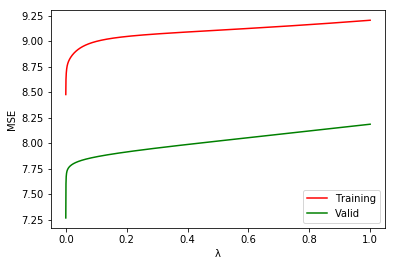

In [503]:
    #finding MSE for training and validation sets 
    
    [λ1, mse1] = L2(X1,y1,21)
    [λ2, mse2] = L2(X2,y2,21)

    plt.plot(λ1, mse1 , 'r', label='Training')
    plt.plot(λ2, mse2, 'g', label='Valid')
    plt.ylabel('MSE')
    plt.xlabel('λ')
    plt.legend()
    plt.show()
    

MSE for test set is:  11.180272335095788 



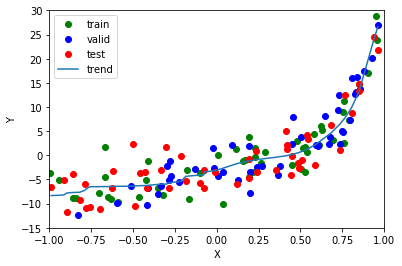

In [504]:
    test_set_1 = pd.read_csv('Datasets/Dataset_1_test.csv', header=None, usecols=[0,1], names=['x','y'])

    x3 = np.array(test_set_1['x'])
    y3 = np.array(test_set_1['y'])

    X3 = matrixBuilder(x3, 21)
    
    z = np.identity(21)*0.0001
    new_w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X1),X1)+z),np.transpose(X1)),y1) #finding new coefficients using training set
    testTarget = np.matmul(X3, new_w) #finding new values of y wrt to x3

    print('MSE for test set is: ', meanSquareError(y3, testTarget), '\n')
    
                                                      
    plt.plot(x1, y1, 'go', label = 'train')
    plt.plot(x2, y2, 'bo', label = 'valid')
    plt.plot(x3, y3, 'ro', label ='test')
    plt.plot(np.sort(x3), np.sort(testTarget), label = 'trend')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.axis([-1.0,1.0,-15.0,30.0])
    plt.legend()
    plt.show()



# Q3.1

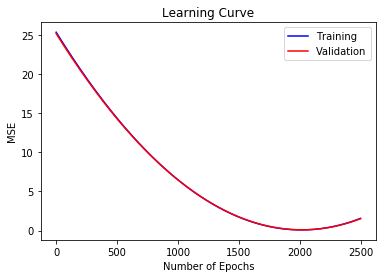

[25.17578311 25.15093937 25.12610794 ...  1.51130735  1.51720908
  1.52312312]


In [505]:
#function to calculate the MSE
def lin_mse(gradient, intercept, x, y, epoch):
    mse = np.zeros(epoch)
    for i in range(epoch):
        for j in range(len(x)):
            mse [i] += (y[j] - (gradient[i] * x[j]+ intercept[i])) ** 2 #squaring the difference of the predicted and true value
        mse [i] = mse[i] /(2*(len(x)))
    return mse
   

#function to get minimum gradient and intercept for every epoch
def step_gradient(current_w0, current_w1, x, y, stepSize , epochs):
    w0_min = 0
    w1_min = 0
    new_w0 = np.zeros(epochs)
    new_w1 = np.zeros(epochs)
    for i in range(epochs):
        for j in range (len(x)):
            w0_min += ((current_w1 * x[j]) + current_w0) - y[j]  #minimizing the intercept
            w1_min += x[j] * (((current_w1 * x[j]) + current_w0) - y[j]) #minimizing the gradient
        new_w0[i]  = current_w0 - (stepSize * np.mean(w0_min))
        new_w1[i]  = current_w1 - (stepSize * np.mean(w1_min))
    return [new_w0, new_w1]


if __name__ == "__main__":
    training_set_1 = pd.read_csv('Datasets/Dataset_2_train.csv', header=None, usecols=[0,1], names=['x','y'])
    validation_set_1 = pd.read_csv('Datasets/Dataset_2_valid.csv', header=None, usecols=[0,1], names=['x','y'])
    test_set_1 = pd.read_csv('Datasets/Dataset_2_test.csv', header=None, usecols=[0,1], names=['x','y'])
                             
    #converting columns to arrays
    x1 = np.array(training_set_1['x'])
    y1 = np.array(training_set_1['y'])
    x2 = np.array(validation_set_1['x'])
    y2 = np.array(validation_set_1['y'])
    x3 = np.array(test_set_1['x'])
    y3 = np.array(test_set_1['y'])
    
    [b1, m1] = step_gradient(0, 0, x1, y1, 1e-6, 3000)

    MSE1 = lin_mse(m1, b1, x1, y1, 2500)
    MSE2 = lin_mse(m1, b1, x2, y2, 2500)
    
   
    plt.plot(list(range(2500)) , MSE1, 'b', label = 'Training')
    plt.plot(list(range(2500)), MSE2, 'r', label = 'Validation')
    plt.title('Learning Curve')
    plt.ylabel('MSE')
    plt.xlabel('Number of Epochs')
    plt.legend()
    plt.show()
    
    print(MSE2)
    


# Q3.2


In [506]:
y = 1e-1

#calculating MSE for different stepsize 
for i in range (7):
    [b2,m2] = step_gradient(0, 0, x2, y2, y, 2000)
    print('MSE of Validation Set for step-size: ',y, 'is: ', lin_mse(m2, b2, x2, y2,10), '\n') 
    y /= 10

print('\n\nMSE of Test Set for step-size: ',0.001, 'is: ', lin_mse(m1, b1, x3, y3,10), '\n')

MSE of Validation Set for step-size:  0.1 is:  [  5914.43808047  25223.81685373  57953.33695895 104102.99839613
 163672.80116526 236662.74526635 323072.8306994  422903.05746441
 536153.42556137 662823.93499029] 

MSE of Validation Set for step-size:  0.01 is:  [  10.21802336  129.43682087  382.85703171  770.47865586 1292.30169333
 1948.32614412 2738.55200823 3662.97928566 4721.6079764  5914.43808047] 

MSE of Validation Set for step-size:  0.001 is:  [17.66331399 11.46800294  6.61470603  3.10342325  0.9341546   0.10690009
  0.62165971  2.47843346  5.67722134 10.21802336] 

MSE of Validation Set for step-size:  0.0001 is:  [24.38651602 23.585813   22.79853013 22.0246674  21.26422481 20.51720237
 19.78360006 19.06341789 18.35665587 17.66331399] 

MSE of Validation Set for step-size:  1e-05 is:  [25.11862295 25.03674093 24.95499311 24.87337949 24.79190007 24.71055486
 24.62934385 24.54826703 24.46732442 24.38651602] 

MSE of Validation Set for step-size:  1.0000000000000002e-06 is:  [25.1

# Q3.3

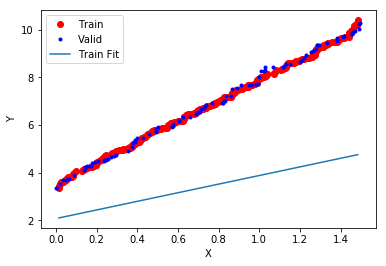

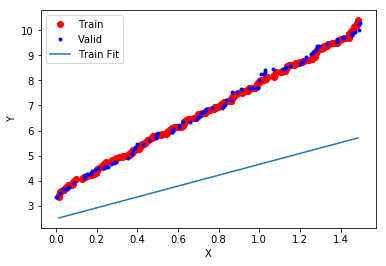

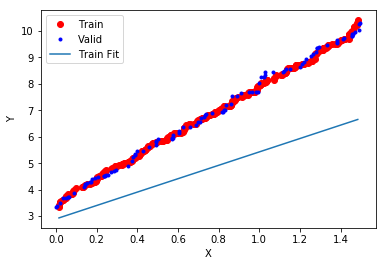

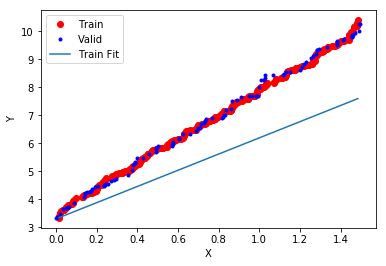

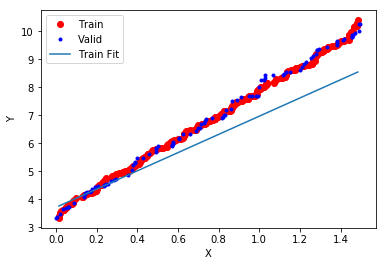

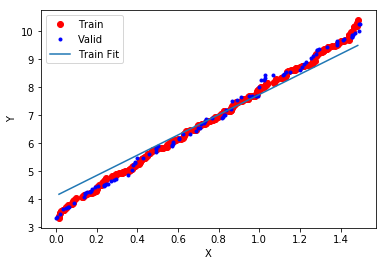

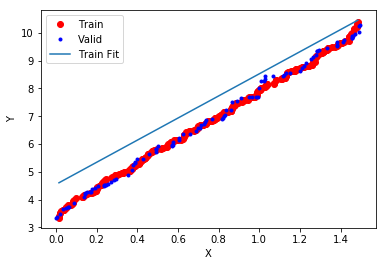

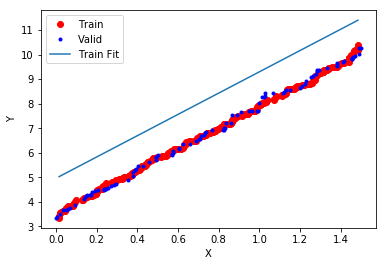

In [507]:
targetTrain = np.zeros(300)

#plotting the best fit for the model using the parameters obtained from training set 
for i in range(1000,2500,200):
    for j in range(len(x1)):
        targetTrain[j] = np.multiply(x1[j],m1[i]) + b1[i]
    plt.plot(np.sort(x1),np.sort(y1),'ro', label = 'Train')
    plt.plot(np.sort(x2),np.sort(y2),'b.', label = 'Valid')
    plt.plot(np.sort(x1),np.sort(targetTrain), label = 'Train Fit')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.legend()
    plt.show()

# Q4.1

In [516]:
rawData = pd.read_csv('Datasets/communities.data.txt', delimiter = ',',header=None, na_values = '?')
rawData.head()

dataCopy = rawData.copy()

#computing the mean and filling in the missing attributes with it
for i in dataCopy:
    try:
        mean = dataCopy[i].mean()
        dataCopy[i].fillna(mean, inplace=True)
    except:
        continue
dataCopy.head()

#computing the median and filling in the missing attributes with it
dataCopy = rawData.copy()
for i in dataCopy:
    try:
        median = dataCopy[i].median()
        dataCopy[i].fillna(median, inplace=True)
    except:
        continue

dataCopy.to_csv('Datasets/completedDataSet.csv', sep=',', encoding='utf-8', index=False , header=False)
dataCopy.head()


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,23.0,48090.0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,23.0,48090.0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,24,23.0,48090.0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03


# 4.2

In [517]:
data_x = np.zeros((1994, 122))
i = 5
k=0
while i <=126:
    rawdata_x = pd.read_csv('Datasets/completedDataSet.csv', header=None, usecols=[i], names=['x'])
    d1 = np.array(rawdata_x['x'])
    for j in range (1994):
        data_x[j][k] = d1[j]  
    i+=1
    k+=1   
rawdata_y = pd.read_csv('Datasets/completedDataSet.csv', header=None, usecols=[127], names=['y'])
data_y = np.array(rawdata_y['y'])

#splitting data and saving in csv file
from sklearn.model_selection import KFold
X = np.array(data_x)
y = data_y
kf = KFold(n_splits=5)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    df1 = pd.DataFrame(X_train)
    df1.insert(loc=122, column = 122, value=y_train)
    df2 = pd.DataFrame(X_test)
    df2.insert(loc=122 , column = 122, value=y_test)
    df1.to_csv("Datasets/CandC-train("+str(i)+").csv",encoding='utf-8', index=False , header=False)
    df2.to_csv("Datasets/CandC-test("+str(i)+").csv",encoding='utf-8', index=False , header=False)
    i+=1

i=1
x1 = []
x2 = []
#using SGD to compute the gradient and y intercept of 5 training sets 
for j in range(5):
    xRawTr1 = pd.read_csv("Datasets/CandC-train("+str(i)+").csv")
    xRawTs1 = pd.read_csv("Datasets/CandC-test("+str(i)+").csv")
    yTr = pd.read_csv("Datasets/CandC-train("+str(i)+").csv", usecols = [122], names = ['y'])
    yTs = pd.read_csv("Datasets/CandC-test("+str(i)+").csv", usecols = [122], names = ['y'])
    y1 = np.array(yTr)
    y2 = np.array(yTs)
    
    #getting the entire row except the last value which is the target value
    xRawTr1 = np.array(xRawTr1)
    xRawTs1 = np.array(xRawTs1)
    for x in range(122):
        x1.append(xRawTr1[x])
        x2.append(xRawTs1[x])
    
    [b, m] = step_gradient(0, 0, x1, y1, 1e-6,1)
    print(b,m)
    #print(lin_mse(m,b,x2,y2,1)) ==>to compute MSE
    i+=1

#use the error function to compute the MSE in a loop through the array using: mse [i] += (y[j] - (gradient[i] * x[j]+ intercept[i])) ** 2
#and then: mse [i] = mse[i] /(2*(len(x)))


[3.395e-05] [1.17515317e-05]
[5.939e-05] [2.05708073e-05]
[8.702e-05] [3.03282033e-05]
[0.00012281] [4.2882826e-05]
[0.0001504] [5.26665382e-05]


# 4.3

In [500]:
i = 0
for j in range(5):
    
    xRawTr1 = pd.read_csv("Datasets/Datasets/CandC-train("+str(i)+").csv")
    xRawTs1 = pd.read_csv("Datasets/CandC-test("+str(i)+").csv")
    yTr = pd.read_csv("Datasets/CandC-train("+str(i)+").csv", usecols = [122], names = ['y'])
    yTs= pd.read_csv("Datasets/CandC-test("+str(i)+").csv", usecols = [122], names = ['y'])
  
    y1 = np.array(yTr)
    y2 = np.array(yTs)
    
    #getting the entire row except the last value which is the target value
    xRawTr1 = np.array(xRawTr1)
    xRawTs1 = np.array(xRawTs1)
    for x in range(122):
        x1.append(xRawTr1[x])
        x2.append(xRawTs1[x])
 
    #[lamda,mse]=L2(x1,y1[0],len(y1)) #==>finding the Mse and lamda from the L2 regularization 
    i+=1


ValueError: shapes (123,1220) and (1,) not aligned: 1220 (dim 1) != 1 (dim 0)